### CLIP OPENAI

https://huggingface.co/openai/clip-vit-base-patch32

In [19]:
import os
import sys
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
import uuid

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))

from config.path import PathHelper
path_helper = PathHelper()

plot_clip_path = path_helper.get_plot_path('clip')

In [20]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

polo_1274.png: 0.84 ___ 0.16
Detected: Upper Body Cloth Type


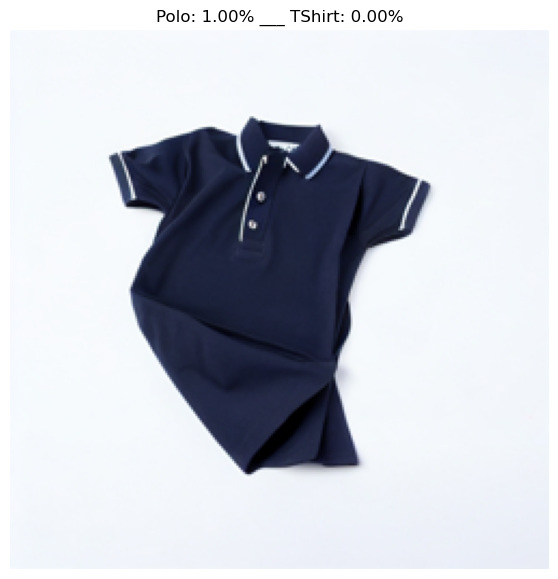

In [33]:
def predictor(text_prompt):
    inputs = processor(text=text_prompt, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    return logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

file_name = 'polo_1274.png'

img_path = path_helper.get_full_cloth_type_path(file_name)

image = Image.open(img_path).convert("RGB")


probs = predictor(['a photo a upper body cloth', ' a photo of a lower body cloth'])
name = img_path.split("/")[-1]
print(f"{name}: {probs[0][0]:.2f} ___ {probs[0][1]:.2f}")


if probs[0][0] < probs[0][1]:
    print("Detected: Lower Body Cloth Type")
    probs = predictor(['a photo of a short pants', ' a photo of a long pants'])
    res = f"Short: {probs[0][0]:.2f}% ___ Pant: {probs[0][1]:.2f}%"

else: 
    print("Detected: Upper Body Cloth Type")
    probs = predictor(['a photo of a polo shirt', ' a photo of a tshirt'])
    res = f"Polo: {probs[0][0]:.2f}% ___ TShirt: {probs[0][1]:.2f}%"

unique_id = str(uuid.uuid4())[:4]  # Extracting the first 4 characters of a UUID
format_string = name.split(".")[0] + "_" + unique_id
fullpath = plot_clip_path + "/" + format_string
# Display the image and the colored segmentation map
plt.figure(figsize=(7, 7))
plt.imshow(image)
plt.axis('off')
plt.title(res)
plt.savefig(fullpath)
plt.imshow(image)
plt.show()